In [9]:
from typing import Any
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
retention_cohort_A_all_df: Any
retention_cohort_B_all_df: Any
retention_cohort_A_purchase_df: Any
retention_cohort_B_purchase_df: Any
%store -r retention_cohort_A_all_df
%store -r retention_cohort_B_all_df
%store -r retention_cohort_A_purchase_df
%store -r retention_cohort_B_purchase_df

In [10]:
print(retention_cohort_A_all_df)
print(retention_cohort_B_all_df)

   Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           52.483901       47.516099
2    2           45.860166       54.139834
3    3           41.835327       58.164673
4    4           37.971481       62.028519
5    5           33.578657       66.421343
6    6           28.449862       71.550138
7    7           22.079117       77.920883
   Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           55.171619       44.828381
2    2           47.385395       52.614605
3    3           42.271366       57.728634
4    4           38.124856       61.875144
5    5           33.471550       66.528450
6    6           28.587883       71.412117
7    7           21.101129       78.898871


In [11]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")


In [12]:
# splitting data into two dataframes by column AB_Cohort
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Saving two DataFrames to CSV files
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

In [13]:
#Function to calculate average revenue per user by day
def calculate_avg_revenue(data, filter_by_purchase=False):
    if filter_by_purchase:
        data = data[data['CountBuy'] > 0]

    # We group the data by Retention, User_id, then calculate the amount of revenue for each user on each day
    revenue_by_user_day = data.groupby(['Retention', 'User_id'])['SumRevenue'].sum().reset_index()

    # We calculate the average income by users per day
    avg_revenue_by_user_day = revenue_by_user_day.groupby(['Retention'])['SumRevenue'].mean().reset_index()

    # We calculate the average income for all days
    revenue_by_user = data.groupby('User_id')['SumRevenue'].sum().reset_index()
    avg_revenue_all_days = revenue_by_user['SumRevenue'].mean()


    return avg_revenue_by_user_day, avg_revenue_all_days

# We calculate the average income for all users
avg_revenue_cohort_A_all_users_by_day,avg_revenue_cohort_A_all_users = calculate_avg_revenue(data_cohort_A)

%store avg_revenue_cohort_A_all_users_by_day

avg_revenue_cohort_B_all_users_by_day,avg_revenue_cohort_B_all_users =calculate_avg_revenue(data_cohort_B)

%store avg_revenue_cohort_B_all_users_by_day

# We calculate the average income for users with purchases
avg_revenue_cohort_A_purchase_users_by_day,avg_revenue_cohort_A_purchase_users = calculate_avg_revenue(data_cohort_A, filter_by_purchase=True)
avg_revenue_cohort_B_purchase_users_by_day,avg_revenue_cohort_B_purchase_users = calculate_avg_revenue(data_cohort_B, filter_by_purchase=True)

print("Average income for cohort A for all users by day:",avg_revenue_cohort_A_all_users_by_day)
print("Average income for cohort A for all users over 7 days:",avg_revenue_cohort_A_all_users)
print("Average income for cohort B for all users by day:",avg_revenue_cohort_B_all_users_by_day)
print("Average income for cohort B for all users over 7 days:",avg_revenue_cohort_B_all_users)
print("Average income for cohort A for users with daily purchases:",avg_revenue_cohort_A_purchase_users_by_day)
print("Average income for cohort A for users with purchases in 7 days:",avg_revenue_cohort_A_purchase_users)
print("Average income for cohort B for users with daily purchases:",avg_revenue_cohort_B_purchase_users_by_day)
print("Average income for cohort B for users with purchases in 7 days:",avg_revenue_cohort_B_purchase_users)


Stored 'avg_revenue_cohort_A_all_users_by_day' (DataFrame)
Stored 'avg_revenue_cohort_B_all_users_by_day' (DataFrame)
Average income for cohort A for all users by day:    Retention  SumRevenue
0          0    0.775075
1          1    0.601936
2          2    0.555142
3          3    0.397699
4          4    0.817866
5          5    0.098973
6          6    0.717817
7          7    0.852083
Average income for cohort A for all users over 7 days: 1.8707451701931923
Average income for cohort B for all users by day:    Retention  SumRevenue
0          0    1.557305
1          1    2.580608
2          2    1.827910
3          3    2.981163
4          4    1.030303
5          5    0.182432
6          6    2.913219
7          7    4.058952
Average income for cohort B for all users over 7 days: 5.829993089149966
Average income for cohort A for users with daily purchases:    Retention  SumRevenue
0          0  304.181818
1          1  142.142857
2          2  124.166667
3          3  121.000000


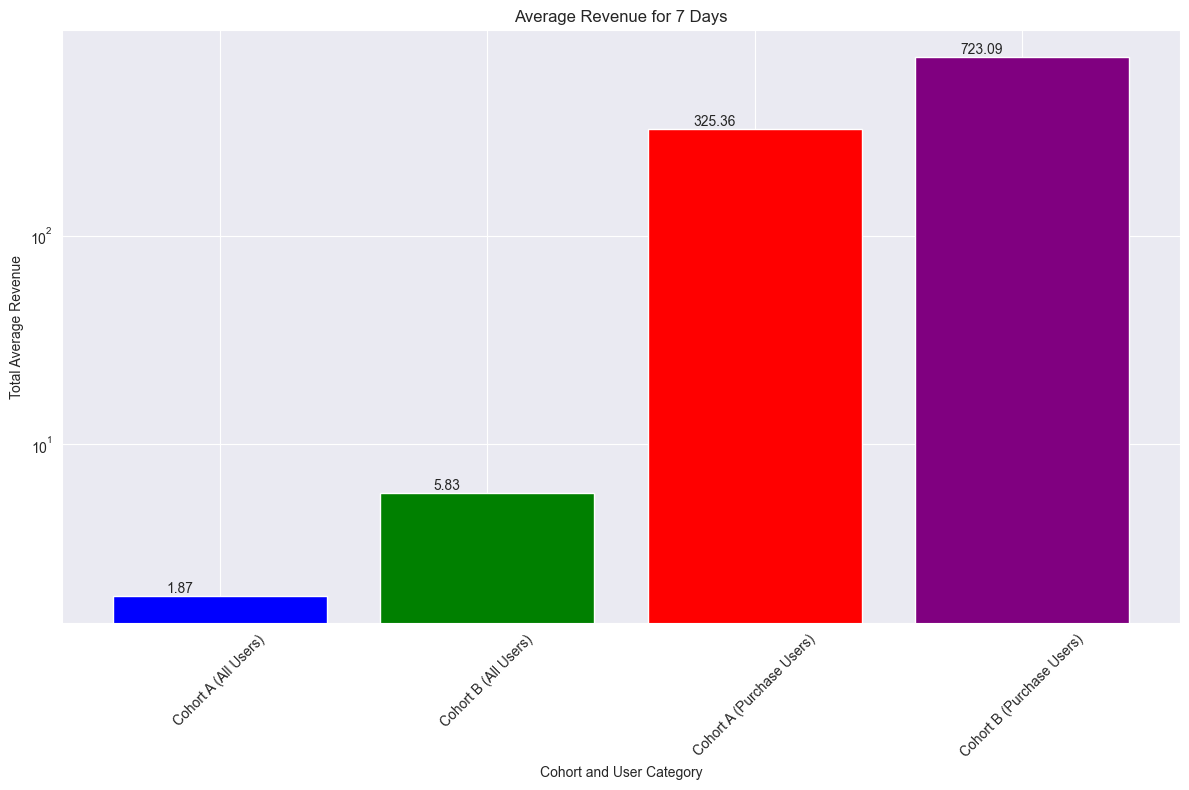

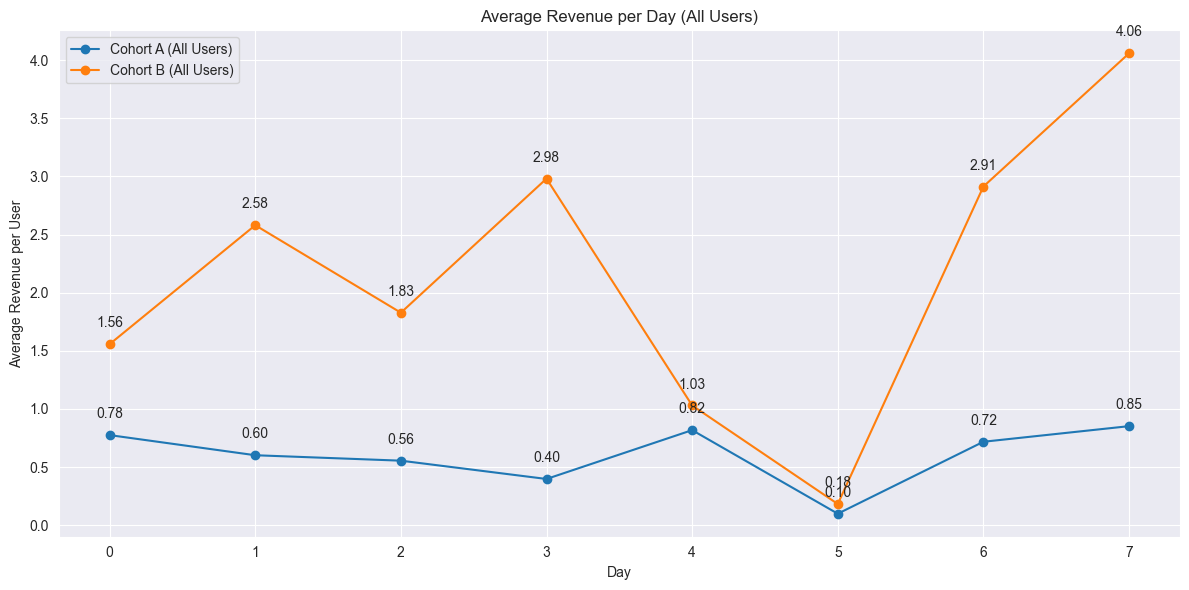

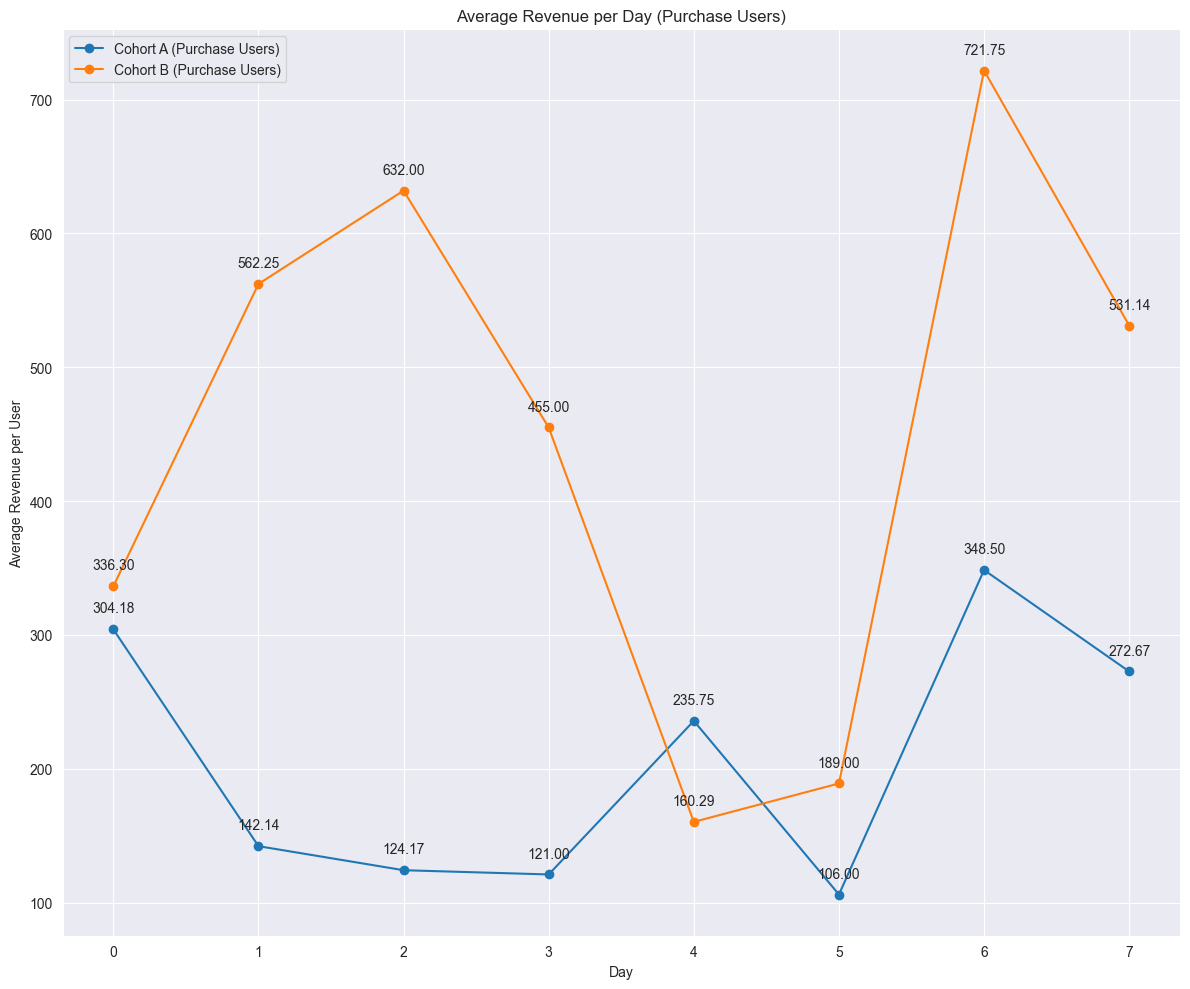

In [14]:
#1.2 Average revenue per user
days = np.arange(0, 8)  # 7 дней

revenue_data_7_days = [avg_revenue_cohort_A_all_users, avg_revenue_cohort_B_all_users,
                       avg_revenue_cohort_A_purchase_users, avg_revenue_cohort_B_purchase_users]

labels_7_days = ['Cohort A (All Users)', 'Cohort B (All Users)', 'Cohort A (Purchase Users)', 'Cohort B (Purchase Users)']

# Create a histogram for 7-day data with a logarithmic scale
plt.figure(figsize=(12, 8))
bars = plt.bar(labels_7_days, revenue_data_7_days, color=['blue', 'green', 'red', 'purple'])
plt.title('Average Revenue for 7 Days')
plt.xlabel('Cohort and User Category')
plt.ylabel('Total Average Revenue')
plt.xticks(rotation=45)
plt.yscale('log')  # Добавление логарифмической шкалы

# Adding Quantity Values Inside Columns
for bar, revenue in zip(bars, revenue_data_7_days):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, revenue, f'{revenue:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Data for the graph of changes in average revenue per user by day
revenue_data_per_day_A_all_users = avg_revenue_cohort_A_all_users_by_day['SumRevenue']
revenue_data_per_day_B_all_users = avg_revenue_cohort_B_all_users_by_day['SumRevenue']
revenue_data_per_day_A_purchase_users = avg_revenue_cohort_A_purchase_users_by_day['SumRevenue']
revenue_data_per_day_B_purchase_users = avg_revenue_cohort_B_purchase_users_by_day['SumRevenue']

# Creating a graph of changes in average revenue per user by day for "All Users"
plt.figure(figsize=(12, 6))
plt.plot(days, revenue_data_per_day_A_all_users, marker='o', label='Cohort A (All Users)')
plt.plot(days, revenue_data_per_day_B_all_users, marker='o', label='Cohort B (All Users)')
plt.title('Average Revenue per Day (All Users)')
plt.xlabel('Day')
plt.ylabel('Average Revenue per User')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Adding Quantity Values Next to Data Points for Cohort A and Cohort B - All Users
for day, revenue_A_all, revenue_B_all in zip(
    days, revenue_data_per_day_A_all_users, revenue_data_per_day_B_all_users
):
    plt.annotate(f'{revenue_A_all:.2f}', (day, revenue_A_all), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)
    plt.annotate(f'{revenue_B_all:.2f}', (day, revenue_B_all), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)

# Creating a graph of changes in average revenue per user by day for "Purchase Users" (if data is available)
if 'avg_revenue_cohort_A_purchase_users_by_day' in locals() and 'avg_revenue_cohort_B_purchase_users_by_day' in locals():
    plt.figure(figsize=(12, 10))
    plt.plot(days, revenue_data_per_day_A_purchase_users, marker='o', label='Cohort A (Purchase Users)')
    plt.plot(days, revenue_data_per_day_B_purchase_users, marker='o', label='Cohort B (Purchase Users)')
    plt.title('Average Revenue per Day (Purchase Users)')
    plt.xlabel('Day')
    plt.ylabel('Average Revenue per User')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Adding Quantity Values Next to Data Points for Cohort A and Cohort B - Purchase Users
    for day, revenue_A_purchase, revenue_B_purchase in zip(
        days, revenue_data_per_day_A_purchase_users, revenue_data_per_day_B_purchase_users
    ):
        plt.annotate(f'{revenue_A_purchase:.2f}', (day, revenue_A_purchase), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)
        plt.annotate(f'{revenue_B_purchase:.2f}', (day, revenue_B_purchase), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)

plt.show()


In [15]:
#2.1 LTV
ltv_A_all_users_7_days = (
    float(avg_revenue_cohort_A_all_users) *
    retention_cohort_A_all_df["Retention Rate (%)"][7] /
    retention_cohort_A_all_df["Churn Rate (%)"][7]
)

ltv_B_all_users_7_days = (
    float(avg_revenue_cohort_B_all_users) *
    retention_cohort_B_all_df["Retention Rate (%)"][7] /
    retention_cohort_B_all_df["Churn Rate (%)"][7]
)



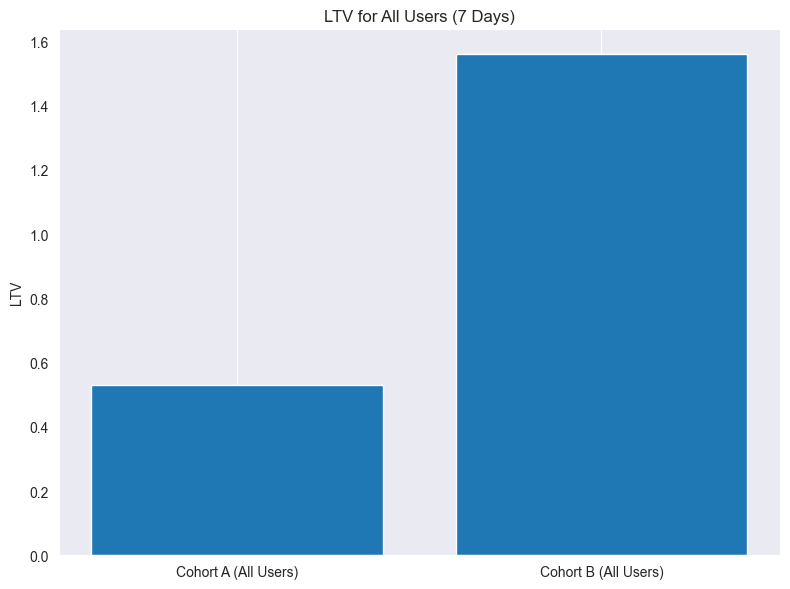

In [16]:
#2.2 LTV graph
# Create an LTV histogram for cohorts A and B (all users) over 7 days
plt.figure(figsize=(8, 6))
plt.bar(['Cohort A (All Users)', 'Cohort B (All Users)'], [ltv_A_all_users_7_days, ltv_B_all_users_7_days])
plt.title('LTV for All Users (7 Days)')
plt.ylabel('LTV')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
